# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancer=pd.read_csv("breast-cancer-wisconsin-data.csv")

In [3]:
cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cancer.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
# Bare Nuclei is of object data type but its values are of int data type

In [5]:
cancer.shape

(699, 11)

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [8]:
# Bare Nuclei column is missing this means it might have some suspicious values which might be non-numeric

In [9]:
cancer.isnull().any() 

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [10]:
cancer.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [11]:
cancer['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [12]:
non_numeric=cancer['Bare Nuclei'].str.isdigit()


In [13]:
non_numeric

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23     False
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
669     True
670     True
671     True
672     True
673     True
674     True
675     True
676     True
677     True
678     True
679     True
680     True
681     True
682     True
683     True
684     True
685     True
686     True
687     True
688     True
689     True
690     True
691     True
692     True
693     True
694     True
695     True
696     True
697     True
698     True
Name: Bare Nuclei, Length: 699, dtype: bool

In [14]:
# non numeric will have all the values denoted by boolean true for being numeric and for false for being non-numeric.

In [15]:
bare=non_numeric[non_numeric == False]

In [16]:
bare.shape

(16,)

In [17]:
cancer = cancer.replace('?', np.nan)

In [18]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [19]:
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].astype('float')

In [20]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [21]:
numeric_cols = cancer.drop(['ID','Class'], axis=1) # getting the numerical columns

In [22]:
numeric_cols.head(5)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [23]:
numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0) # replacing the na values with median

In [24]:
cancer = numeric_cols.join(cancer['Class'])

In [25]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [26]:
cancer.isnull().any()

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [27]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [28]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [29]:
cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [31]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


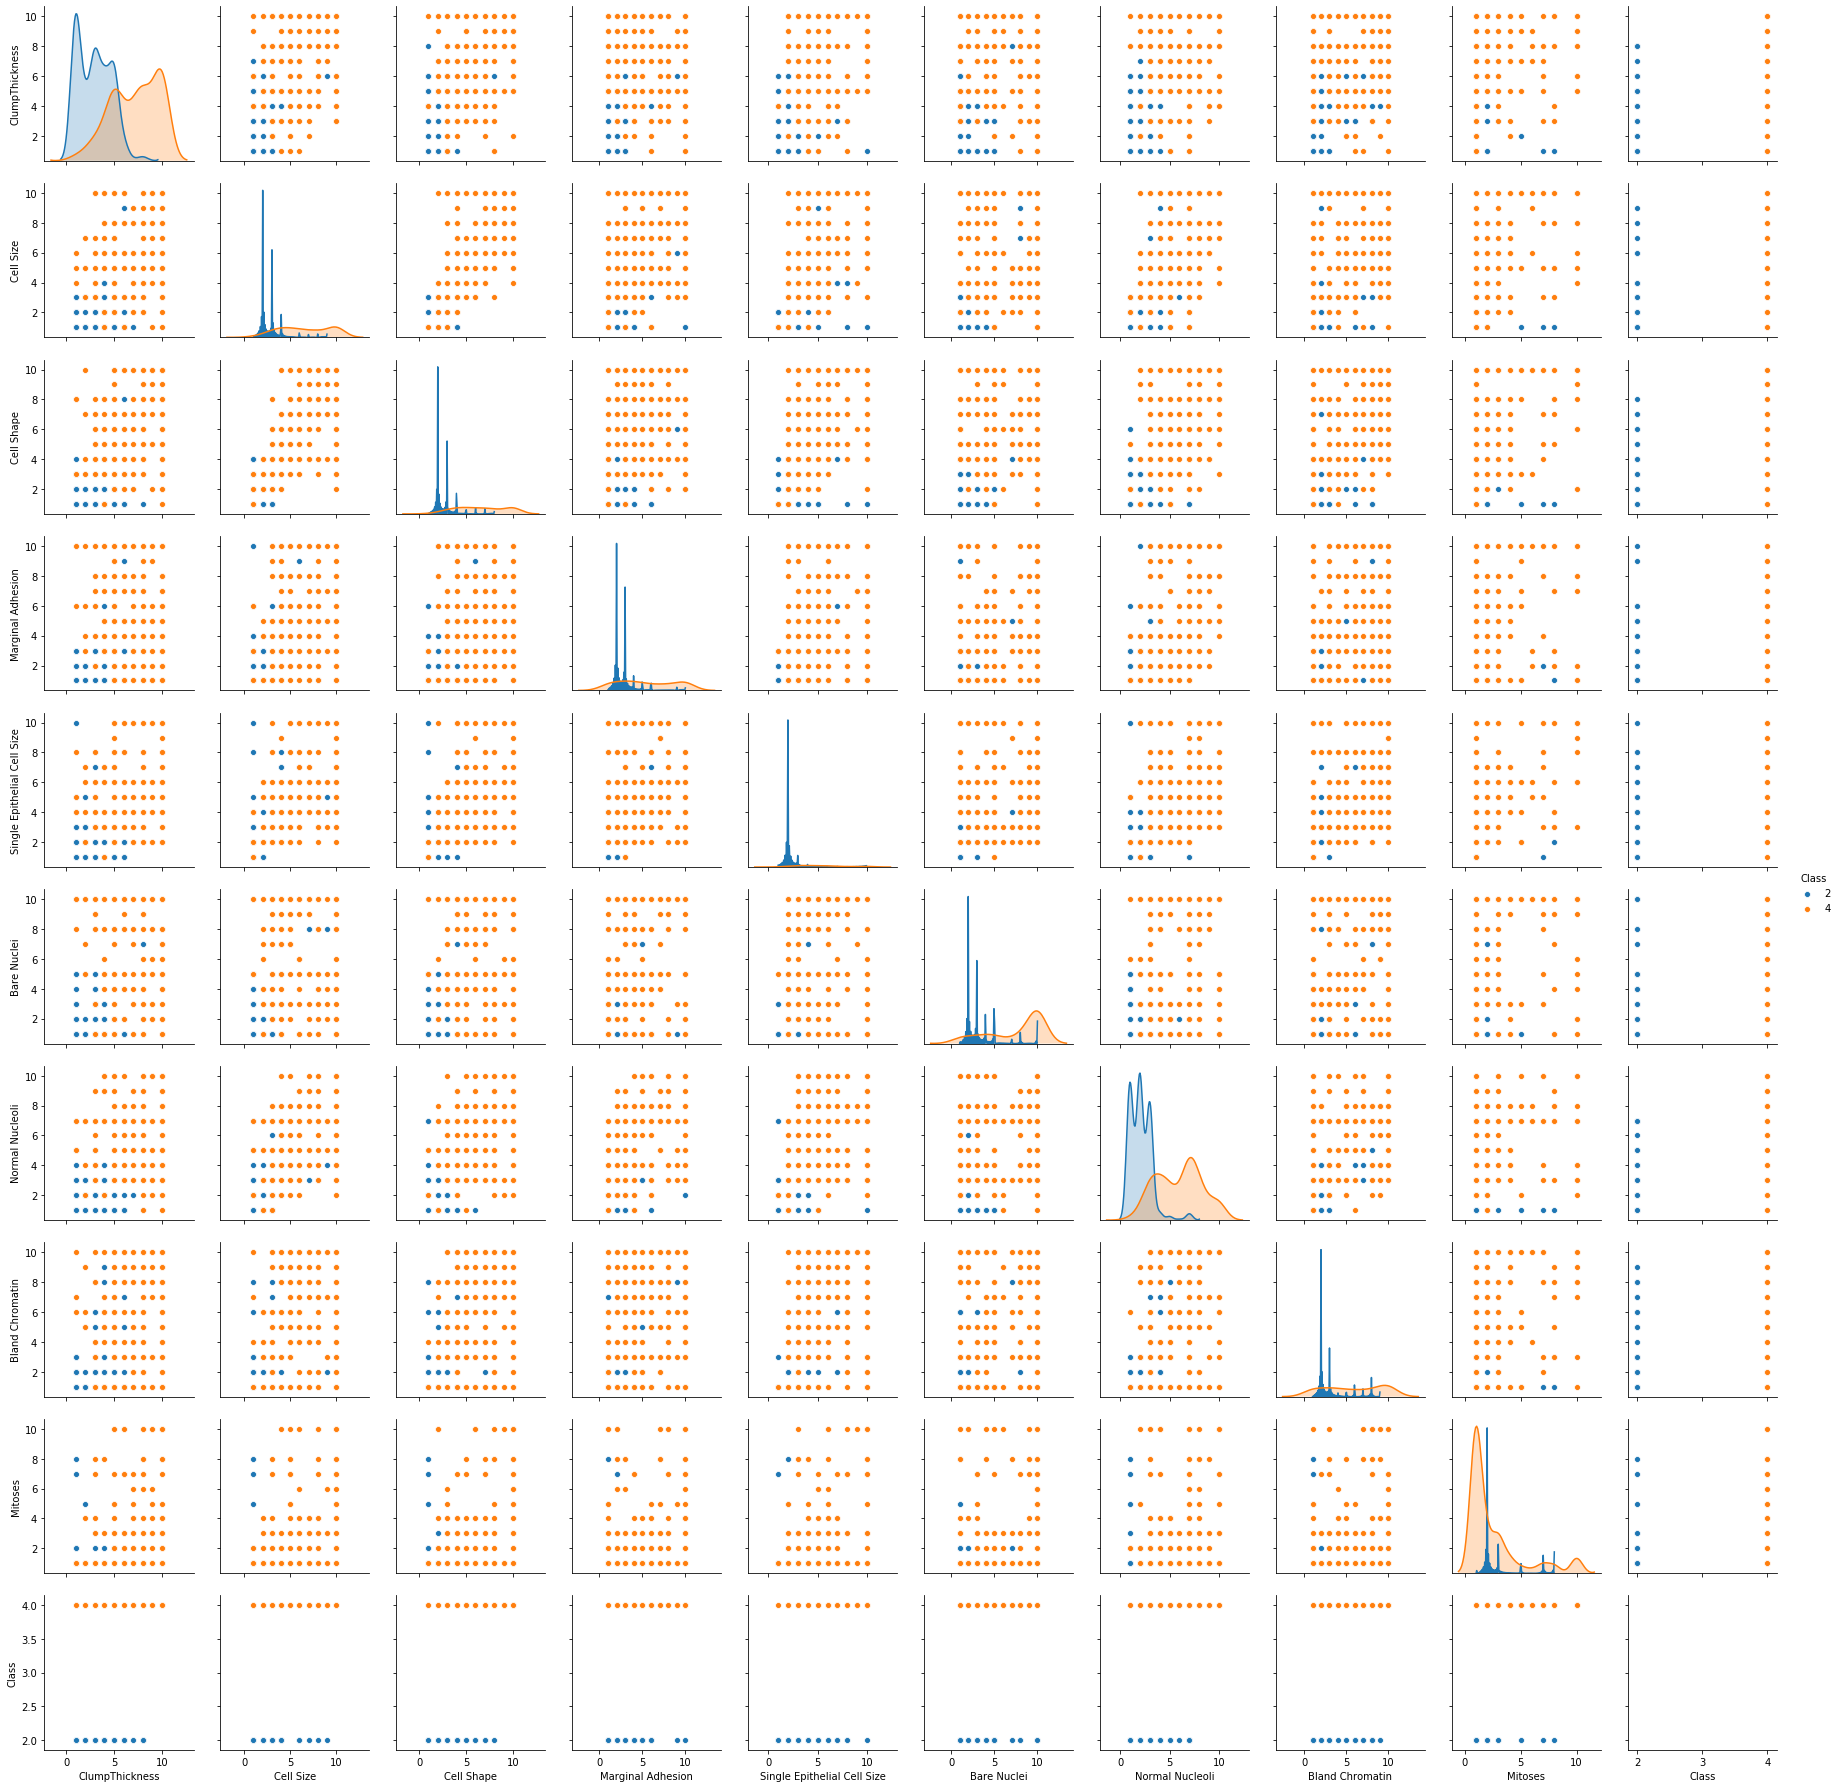

In [33]:
sns.pairplot(cancer, diag_kind='kde',hue='Class')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [ ]:
# Column Mitoses has long right tail and couple of bulges indicating outliers and an asymmetrical distribution
# Similarly for Marginal Adhesion , Single Epithelial Cell Size ,Normal Nucleoli,Bland Chromatin and Bland Chromatin have bulges which indicate a presence of outliers

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

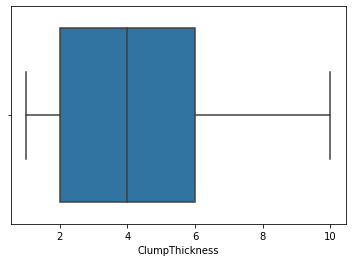

In [34]:
sns.boxplot(x=cancer["ClumpThickness"])

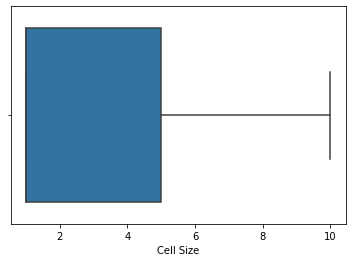

In [35]:
sns.boxplot(x=cancer["Cell Size"])

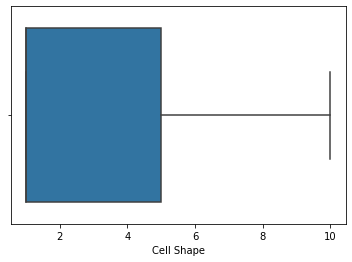

In [36]:
sns.boxplot(x=cancer["Cell Shape"])

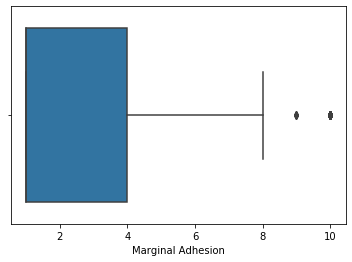

In [37]:
sns.boxplot(x=cancer["Marginal Adhesion"])

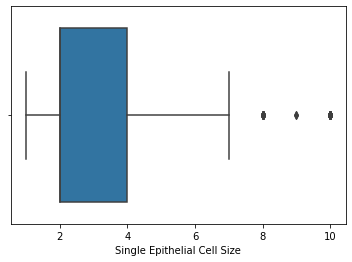

In [38]:
sns.boxplot(x=cancer["Single Epithelial Cell Size"])

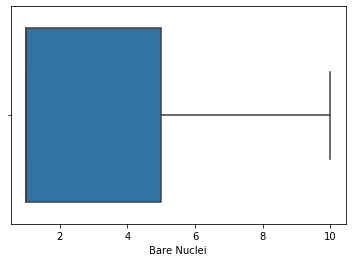

In [39]:
sns.boxplot(x=cancer["Bare Nuclei"])

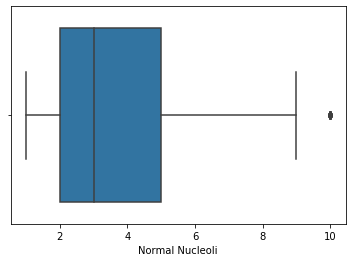

In [40]:
sns.boxplot(x=cancer["Normal Nucleoli"])

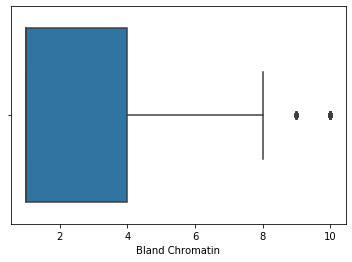

In [41]:
sns.boxplot(x=cancer["Bland Chromatin"])

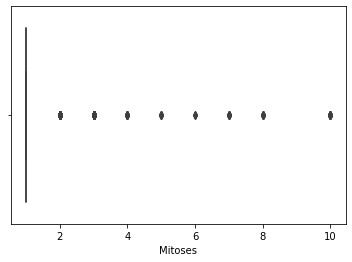

In [42]:
sns.boxplot(x=cancer["Mitoses"])

In [ ]:
# as per boxplot analysis there are 5 columns which have outliers.

In [ ]:
#treating outliers

In [43]:
pd.crosstab(cancer['Marginal Adhesion'],cancer['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [44]:
cancer['Marginal Adhesion']=np.where(cancer['Marginal Adhesion']>5,5,cancer['Marginal Adhesion'])

In [45]:
pd.crosstab(cancer['Marginal Adhesion'],cancer['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,10,133


In [46]:
pd.crosstab(cancer['Single Epithelial Cell Size'],cancer['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [47]:
cancer['Single Epithelial Cell Size']=np.where(cancer['Single Epithelial Cell Size']>6,6,cancer['Single Epithelial Cell Size'])

In [48]:
pd.crosstab(cancer['Single Epithelial Cell Size'],cancer['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,8,99


In [49]:
pd.crosstab(cancer['Normal Nucleoli'],cancer['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


In [50]:
cancer['Normal Nucleoli']=np.where(cancer['Normal Nucleoli']>7,7,cancer['Normal Nucleoli'])

In [51]:
pd.crosstab(cancer['Normal Nucleoli'],cancer['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,125


In [52]:
pd.crosstab(cancer['Bland Chromatin'],cancer['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [53]:
cancer['Bland Chromatin']=np.where(cancer['Bland Chromatin']>5,5,cancer['Bland Chromatin'])

In [54]:
pd.crosstab(cancer['Bland Chromatin'],cancer['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,13,145


In [55]:
pd.crosstab(cancer['Mitoses'],cancer['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [56]:
cancer['Mitoses']=np.where(cancer['Mitoses']>5,5,cancer['Mitoses'])

In [57]:
pd.crosstab(cancer['Bland Chromatin'],cancer['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,13,145


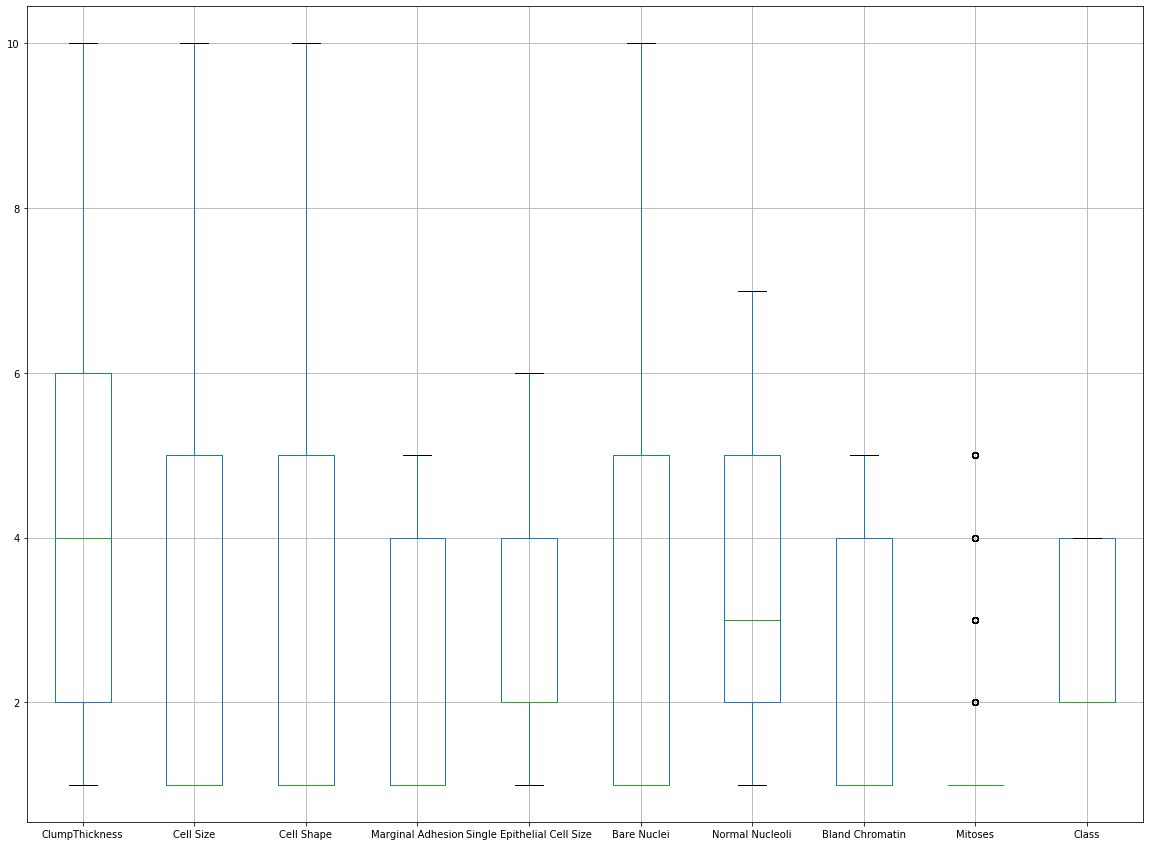

In [58]:
cancer.boxplot(column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],figsize =(20,15))

In [ ]:
# most column's outliers are treated except Mitoses 

# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [62]:
X = cancer.drop('Class',axis=1)
y = cancer["Class"]

In [76]:
X.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,6,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,5,1
4,4,1,1,3,2,1.0,3,1,1


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_train_std =  sc.fit_transform(X)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.5412577  0.56413691 0.5908535
  0.57283842 0.56679455 0.39012503]
 [0.64583645 1.00143266 0.90818117 0.72835309 0.79059498 0.68765657
  0.74365474 0.73114712 0.49803826]
 [0.65552689 0.90818117 1.00143266 0.70884596 0.76233939 0.70848734
  0.72819623 0.72305564 0.47382672]
 [0.5412577  0.72835309 0.70884596 1.00143266 0.67701796 0.7003226
  0.69094006 0.66502316 0.41573208]
 [0.56413691 0.79059498 0.76233939 0.67701796 1.00143266 0.64866184
  0.6693079  0.70621971 0.48219983]
 [0.5908535  0.68765657 0.70848734 0.7003226  0.64866184 1.00143266
  0.6955454  0.63439548 0.41418324]
 [0.57283842 0.74365474 0.72819623 0.69094006 0.6693079  0.6955454
  1.00143266 0.68709249 0.39257775]
 [0.56679455 0.73114712 0.72305564 0.66502316 0.70621971 0.63439548
  0.68709249 1.00143266 0.45532997]
 [0.39012503 0.49803826 0.47382672 0.41573208 0.48219983 0.41418324
  0.39257775 0.45532997 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [97]:
# Step 2- Get eigen values and eigen vector

In [98]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30134938 -0.05679287  0.91274011  0.00839277  0.01273078 -0.16465305
  -0.0959038  -0.11099273  0.15494694]
 [-0.37211644 -0.03009167 -0.02914314  0.73598448 -0.31856407  0.29133788
   0.30284417 -0.11612607 -0.16291314]
 [-0.36874384 -0.06443934  0.02788111 -0.66368338 -0.28100035  0.45152089
   0.31698585 -0.0230588  -0.18649001]
 [-0.33780667 -0.14811731 -0.27818327 -0.04846943  0.36116017 -0.03968675
   0.16302553 -0.56221298  0.55636339]
 [-0.34729663  0.0279381  -0.19383641 -0.07529091 -0.38154025 -0.68751722
   0.23615497  0.35727713  0.18355991]
 [-0.33447049 -0.15813062 -0.00519821  0.08246613  0.6412422   0.15989879
   0.11702574  0.63597796 -0.03707219]
 [-0.34126763 -0.21142778 -0.14155615 -0.0472017   0.17748193 -0.33983579
  -0.3141701  -0.30312596 -0.69209259]
 [-0.339566   -0.022543   -0.17293741  0.01426753 -0.26164627  0.26235087
  -0.7766814   0.17026726  0.29079916]
 [-0.23744141  0.94804123 -0.01864999 -0.02303385  0.17953792  0.00125459
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [99]:
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(6.1085326779492215, array([-0.30134938, -0.37211644, -0.36874384, -0.33780667, -0.34729663,
       -0.33447049, -0.34126763, -0.339566  , -0.23744141])), (0.711842959410078, array([-0.05679287, -0.03009167, -0.06443934, -0.14811731,  0.0279381 ,
       -0.15813062, -0.21142778, -0.022543  ,  0.94804123])), (0.5084993860244432, array([ 0.91274011, -0.02914314,  0.02788111, -0.27818327, -0.19383641,
       -0.00519821, -0.14155615, -0.17293741, -0.01864999])), (0.41917733689443953, array([ 0.01273078, -0.31856407, -0.28100035,  0.36116017, -0.38154025,
        0.6412422 ,  0.17748193, -0.26164627,  0.17953792])), (0.3339644640636424, array([-0.0959038 ,  0.30284417,  0.31698585,  0.16302553,  0.23615497,
        0.11702574, -0.3141701 , -0.7766814 , -0.02508929])), (0.3058154357346108, array([ 0.15494694, -0.16291314, -0.18649001,  0.55636339,  0.18355991,
       -0.03707219, -0.69209259,  0.29079916, -0.08066671])), (0.2865818869408624, array([-0.11099273, -0.11612607, -0.0230588 , -0

In [100]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  
cum_var_exp = np.cumsum(var_explained) 


In [101]:
var_explained

[0.677754857607464,
 0.07898050956417652,
 0.056419102121294126,
 0.04650862838218388,
 0.037054076604104653,
 0.03393088128163381,
 0.03179687761639198,
 0.027687719349502895,
 0.009867347473248174]

In [102]:
cum_var_exp

array([0.67775486, 0.75673537, 0.81315447, 0.8596631 , 0.89671717,
       0.93064806, 0.96244493, 0.99013265, 1.        ])

# Q9  PCA command from sklearn and find Principal Components. Transform data to components formed

In [113]:
from sklearn.decomposition import PCA
pca_cancer=PCA(n_components=4)


In [114]:
pca_model= pca_cancer.fit_transform(X)

In [115]:
PCA_CANCER=pd.DataFrame(data=pca_cancer.components_,columns=X.columns)

In [116]:
PCA_CANCER

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.347351,0.452332,0.441397,0.211075,0.208008,0.509003,0.280945,0.214746,0.089231
1,0.275972,0.366384,0.303987,-0.042865,0.088981,-0.824966,-0.014552,0.069963,0.041998
2,0.894765,-0.300223,-0.242525,-0.100338,-0.123933,0.062239,-0.115642,-0.086082,-0.018983
3,-0.016782,0.190796,0.375586,-0.227253,-0.074181,0.208425,-0.785503,-0.323238,0.012882


# Q10 Find correlation between components and features

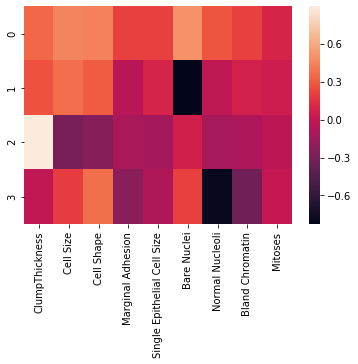

In [117]:
sns.heatmap(PCA_CANCER)

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [74]:
joker=pd.read_csv('jokes.csv')

In [118]:
joker.shape

(24983, 101)

In [75]:
joker.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [121]:
ratings=joker.iloc[0:200,1:]

In [122]:
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Change the column indices from 0 to 99

In [124]:
x=np.arange(0,100) 

In [125]:
ratings.columns=x

In [126]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [ ]:
cancer = cancer.replace('?', np.nan)


In [133]:
ratings=ratings.replace(99.00, 0)

In [134]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [135]:
p= StandardScaler()
ratings_diff=  p.fit_transform(ratings)          


In [136]:
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [157]:
ratings_mean=pd.DataFrame(ratings_diff)

In [158]:
mean_rating=ratings_mean.describe().T

In [159]:
top_ten=mean_rating.sort_values(by='mean',ascending=False).head(10)

In [161]:
top_ten_mean=top_ten['mean']


In [164]:
top_ten

,count,mean,std,min,25%,50%,75%,max
98,200.0,1.840889e-16,1.002509,-3.037688,-0.041444,-0.041444,-0.041444,2.715346
81,200.0,1.243450e-16,1.002509,-2.882298,-0.091677,-0.091677,-0.091677,2.686772
97,200.0,1.198694e-16,1.002509,-2.795808,-0.026858,-0.026858,-0.026858,2.615970
20,200.0,1.065814e-16,1.002509,-2.513592,-0.609441,0.197367,0.843740,1.369785
94,200.0,1.054712e-16,1.002509,-3.127874,-0.175922,-0.175922,-0.175922,2.585483
92,200.0,8.770762e-17,1.002509,-3.404882,-0.362193,-0.362193,0.143094,2.511284
47,200.0,7.771561e-17,1.002509,-2.234459,-0.579190,0.153438,0.754402,1.591762
73,200.0,7.743806e-17,1.002509,-3.063284,0.133933,0.133933,0.133933,3.059255
99,200.0,7.549517e-17,1.002509,-3.095201,-0.160954,-0.160954,-0.160954,2.595274
49,200.0,7.494005e-17,1.002509,-3.547769,-0.554066,0.167494,0.763676,1.359858


In [165]:
top_ten_mean=top_ten['mean']

In [166]:
top_ten_mean

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
Name: mean, dtype: float64